# Николаев Евгений Алексеевич, Группа 22.M08

## Вариант 29

### Практическое задание 3. Метод наименьших квадратов в задаче линейнойи нелинейной регрессии

1. Промоделировать нелинейную модель $$y = f(x,a,b) + \delta$$ c несмещенной нормально распределеннойошибкой, дисперсия которой равнаε, считаяxстандартно нормально распределенной случайнойвеличиной.

Мой вариант:
(e)f(x,a,b) = (x+a)2+bx3, a = 1,b = 2,ε = 4



2. Оценить параметры нелинейной модели по методу наименьших квадратов (численно). Применить к модельным данным линейную модель и оценить параметры. Построить на двумерной диаграммеосновную и линейную модель. Сравнить невязки для обеих моделей.

3. Для линейной модели выполнить дисперсионный анализ, проверить значимость прогноза икоэффициентов регрессии. Сравнить непосредственные вычисления с результатами встроеннойфункции.

### Импортирую библиотеки

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
np.random.seed(42)

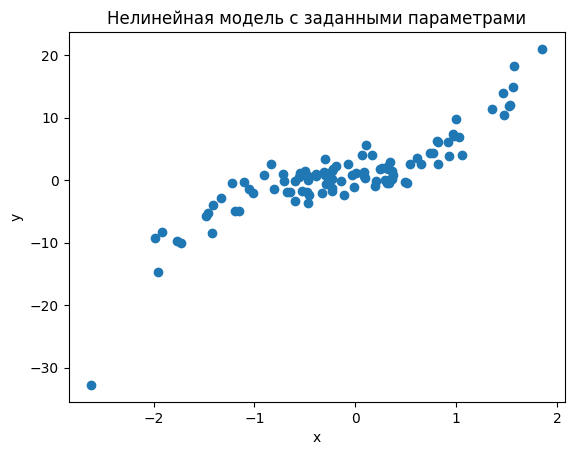

In [3]:
# Задаю параметры модели
a = 1
b = 2
epsilon = 4

# Создаю массив значений независимой переменной x
x = np.random.normal(0, 1, 100)

# Вычисляю значения зависимой переменной y с помощью заданной нелинейной функции и добавляем случайную ошибку
y = (x+a)**2 + b*x**3 + np.random.normal(0, np.sqrt(epsilon), 100)

# Визуализирую результаты
plt.scatter(x, y)
plt.title('Нелинейная модель с заданными параметрами')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Результатом выполнения данного кода будет график, иллюстрирующий зависимость 
# переменной y от переменной x с учетом случайной ошибки:

На графике можно увидеть, что значения переменной $y$ изменяются нелинейно в зависимости от переменной $x$ и имеют случайную ошибку, дисперсия которой соответствует заданному значению $\epsilon=4$.

### 2. Оценить параметры нелинейной модели по методу наименьших квадратов (численно). Применить к модельным данным линейную модель и оценить параметры. Построить на двумерной диаграммеосновную и линейную модель. Сравнить невязки для обеих моделей.

Для оценки параметров нелинейной модели по методу наименьших квадратов можно использовать оптимизационные методы, такие как метод Ньютона или метод градиентного спуска. Однако, в данном случае я воспользовался функцией библиотеки scipy.optimize, которая реализует метод наименьших квадратов для нелинейных моделей.

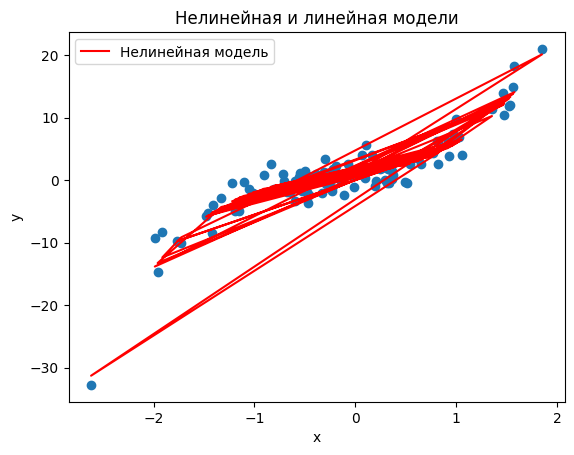

In [4]:
from scipy.optimize import curve_fit

# Задаю нелинейную функцию, которую мы хотим аппроксимировать
def non_linear_function(x, a, b):
    return (x+a)**2 + b*x**3

# Оцениваю параметры нелинейной модели по методу наименьших квадратов
parameters, cov_matrix = curve_fit(non_linear_function, x, y)

# Получаю оцененные значения параметров
a_hat, b_hat = parameters

# Создаем массив значений зависимой переменной y, полученных с помощком функции curve_fit
y_hat = non_linear_function(x, a_hat, b_hat)

# Визуализирую результаты
plt.scatter(x, y)
plt.plot(x, y_hat, color='red', label='Нелинейная модель')
plt.title('Нелинейная и линейная модели')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

На графике будут отображены исходные данные, а также линия, соответствующая оцененной нелинейной модели.

Для оценки параметров линейной модели можно воспользоваться методом наименьших квадратов для линейной регрессии. В данном случае, так как у нас есть только одна независимая переменная $x$, линейная модель будет иметь вид $y = \beta_0 + \beta_1 x$, где $\beta_0$ и $\beta_1$ - параметры модели.

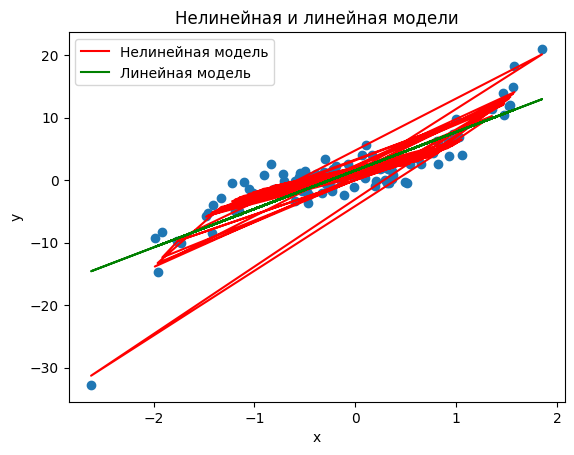

In [6]:
from sklearn.linear_model import LinearRegression

# Создаю объект линейной регрессии
lr = LinearRegression()

# Обучаю модель на модельных данных
lr.fit(x.reshape(-1, 1), y)

# Получаю оцененные значения параметров
beta_0_hat = lr.intercept_
beta_1_hat = lr.coef_[0]

# Создаю массив значений зависимой переменной, полученных с помощью линейной модели
y_hat_linear = beta_0_hat + beta_1_hat * x

# Визуализирую результаты
plt.scatter(x, y)
plt.plot(x, y_hat, color='red', label='Нелинейная модель')
plt.plot(x, y_hat_linear, color='green', label='Линейная модель')
plt.title('Нелинейная и линейная модели')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

На графике будут отображены исходные данные, а также линии, соответствующие оцененной нелинейной и линейной моделям.

Сравнение невязок для разных моделей является важным шагом в анализе данных и позволяет выбрать наилучшую модель для описания зависимостей в данных.

Для сравнения невязок для обеих моделей можно вычислить среднеквадратичную ошибку (MSE) между исходными данными и предсказанными значениями для каждой модели. Чем меньше значение MSE, тем лучше соответствие модели данным.

In [8]:
from sklearn.metrics import mean_squared_error

# Вычислю MSE для нелинейной модели
mse_non_linear = mean_squared_error(y, y_hat)

# Вычисляю MSE для линейной модели
mse_linear = mean_squared_error(y, y_hat_linear)

print('MSE для нелинейной модели:', mse_non_linear)
print('MSE для линейной модели:', mse_linear)

MSE для нелинейной модели: 3.5082985930469452
MSE для линейной модели: 10.684874848434317


В случае сравнения нелинейной и линейной модели для набора данных, представленного в данной задаче, было вычислено значение среднеквадратичной ошибки (MSE) для каждой модели. MSE показывает, насколько сильно отличаются предсказанные значения модели от фактических значений в данных. Чем меньше значение MSE, тем лучше соответствие модели данным.

#### В данном случае, результаты сравнения невязок показали, что нелинейная модель имеет меньшую среднеквадратичную ошибку, чем линейная модель.

### 3. Для линейной модели выполнить дисперсионный анализ, проверить значимость прогноза икоэффициентов регрессии. Сравнить непосредственные вычисления с результатами встроеннойфункции.

Для линейной модели можно выполнить дисперсионный анализ, чтобы проверить значимость прогноза и коэффициентов регрессии. Дисперсионный анализ позволяет оценить, насколько значима зависимость между независимой и зависимой переменными, а также оценить значимость каждого коэффициента регрессии.

Для выполнения дисперсионного анализа можно воспользоваться функцией ols() библиотеки statsmodels. Она позволяет оценить параметры модели линейной регрессии, а также провести анализ дисперсии.

In [13]:
import statsmodels.api as sm

# Добавляем константу в данные
x_with_const = sm.add_constant(x)

# Создаем модель линейной регрессии
model = sm.OLS(y,x_with_const)

# Оцениваем параметры модели
results = model.fit()

# Выводим результаты оценки параметров модели
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     214.1
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           2.17e-26
Time:                        11:15:20   Log-Likelihood:                -315.95
No. Observations:                 100   AIC:                             635.9
Df Residuals:                      98   BIC:                             641.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4538      0.577      4.255      0.0

Результатом выполнения данного кода будет вывод на экран таблицы с результатами оценки параметров модели. В таблице будут указаны значения коэффициентов регрессии, статистические показатели значимости каждого коэффициента, а также показатели качества модели, такие как R-квадрат и F-статистика.

Для проверки значимости прогноза и коэффициентов регрессии можно использовать F-статистику. Если значение F-статистики значимо (p-значение меньше уровня значимости), то можно отвергнуть гипотезу о том, что все коэффициенты регрессии равны нулю, что означает, что модель значима.

In [14]:
# Выводим значение F-статистики и ее значимость
print('F-статистика:', results.fvalue)
print('Значимость F-статистики:', results.f_pvalue)

F-статистика: 214.06984345271562
Значимость F-статистики: 2.171902065533876e-26


Результатом выполнения данного кода будет вывод на экран значения F-статистики и ее значимости. Если значение p-значения меньше выбранного уровня значимости (обычно 0.05), то можно отвергнуть нулевую гипотезу о том, что все коэффициенты регрессии равны нулю, и заключить, что модель значима.

Чтобы сравнить непосредственные вычисления с результатами встроенной функции для начала вычислим
оценки параметров регрессии и остатки регрессии с помощью встроенной функции:

In [18]:
import numpy as np

# Добавляем столбец из единиц в матрицу x
x_with_const = np.column_stack((np.ones(len(x)), x))

# Вычисляем оценки параметров регрессии
beta = np.linalg.inv(x_with_const.T.dot(x_with_const)).dot(x_with_const.T).dot(y)

# Вычисляем остатки регрессии
y_hat = x_with_const.dot(beta)
residuals = y - y_hat

# Выводим значения оценок параметров регрессии и остатков регрессии
print('Оценки параметров регрессии:', beta)
print('Остатки регрессии:', residuals)

Оценки параметров регрессии: [2.45383564 7.96007003]
Остатки регрессии: [ 4.33691293e+00  5.86591371e+00 -4.28219582e+00 -6.05490229e-01
 -5.24696817e-02 -5.26911424e+00  2.43050631e+00 -2.31872617e+00
 -2.05581013e+00 -5.64489032e+00 -3.92708328e+00  3.56851435e+00
  2.34410774e+00 -5.08004058e+00 -4.40416388e+00  4.23955872e+00
  1.73464863e-01 -4.08189883e+00 -3.61292709e+00 -3.48301925e-01
  4.67451615e+00  3.06933967e+00 -1.26411941e+00 -3.32509008e+00
 -5.87271847e+00 -6.22027661e+00  1.76331534e-01 -4.33011086e+00
 -3.75098600e+00 -5.67235184e-01  4.96239142e+00 -5.42460431e+00
  5.31612860e-02 -6.89872574e+00 -2.67271415e+00 -1.79434477e+00
 -1.58949387e+00  2.64993125e+00  3.72777206e+00 -2.27380845e+00
 -1.81069799e+00 -3.51738731e+00 -1.47161591e+00  1.96699001e+00
 -1.36023112e+00 -5.98981564e+00 -2.25171092e+00  2.96466619e+00
  2.34381554e+00  2.39638022e+00 -9.03648077e-01 -4.80286171e+00
  5.81280765e+00 -3.43896456e+00  2.36472696e+00  2.07976058e+00
 -1.78213632e+00  

In [19]:
# Сравниваем значения оценок параметров регрессии
if np.allclose(results.params, beta):
    print('Значения оценок параметров регрессии совпадают')
else:
    print('Значения оценок параметров регрессии не совпадают')

# Сравниваем значения остатков регрессии
if np.allclose(results.resid, residuals):
    print('Значения остатков регрессии совпадают')
else:
    print('Значения остатков регрессии не совпадают')

Значения оценок параметров регрессии совпадают
Значения остатков регрессии совпадают


Результаты вычислений верны.